In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('COVID.csv')
df

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
0,"""1233417783175778304""",https://twitter.com/Giussi92/status/1233417783...,28 Feb 2020 15:44:49,Also the entire Swiss Football League is on ho...,Tweet,Twitter for iPhone,0,0,NaN,NaN,NaN,English,"""1556856595""",Giuseppe Gentile,Giussi92,NaN,Verified,https://twitter.com/Giussi92,Non-Protected,3071,100,30 Jun 2013 00:27:50
1,"""1233417742520332290""",https://twitter.com/LAMofficial/status/1233417...,28 Feb 2020 15:44:40,World Health Org Official: Trump’s press confe...,Tweet,Twitter Web App,0,0,Los Angeles CA USA,NaN,NaN,English,"""113738369""",London After Midnight,LAMofficial,London After Midnight is a music project by wr...,Verified,https://twitter.com/LAMofficial,Non-Protected,4189,84,12 Feb 2010 21:43:17
2,"""1233417741027225602""",https://twitter.com/mitchellvii/status/1233417...,28 Feb 2020 15:44:39,"I mean, Liberals are cheer-leading this #Coron...",Tweet,Twitter Web App,23,64,"Miami, FL",NaN,NaN,English,"""17980523""",Bill Mitchell,mitchellvii,Host of YourVoice™ America at http://yourvoice...,Verified,https://twitter.com/mitchellvii,Non-Protected,534045,10037,09 Dec 2008 01:54:21
3,"""1233417699264356357""",https://twitter.com/HelenKennedy/status/123341...,28 Feb 2020 15:44:29,"Under repeated questioning, Pompeo refuses to ...",Tweet,Twitter for iPhone,4,11,NYC and the North Fork,NaN,NaN,English,"""2199541""",Helen Kennedy,HelenKennedy,Newspaperman (ex NY Daily News &amp; Boston He...,Verified,https://twitter.com/HelenKennedy,Non-Protected,27704,1060,25 Mar 2007 19:14:46
4,"""1233417674274807808""",https://twitter.com/W7VOA/status/1233417674274...,28 Feb 2020 15:44:23,#coronavirus comments now from @larry_kudlow h...,Tweet,Twitter for iPhone,0,0,James S. Brady Press Briefing Room,NaN,NaN,English,"""17919393""",Steve Herman,W7VOA,@WhiteHouse bureau chief @VOANews. Member: @aa...,Verified,https://twitter.com/W7VOA,Non-Protected,94269,1999,06 Dec 2008 08:56:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/120430...,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...,Tweet,Hootsuite Inc.,0,0,NaN,NaN,NaN,Spanish,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de ...,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212...,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",ReTweet,Twitter for Android,0,0,NaN,NaN,NaN,English,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly shaped man. ...",Non-Verified,https://twitter.com/RobNotRob11,Non-Protected,37,259,06 Jan 2016 01:12:42
60157,"""1204206609708331009""",https://twitter.com/timhquotes/status/12042066...,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",Tweet,Twitter for Android,2,28,"Jackson Hole, WY",NaN,NaN,English,"""2195288012""",Tim Heidecker Quotes,timhquotes,Quotes from our favorite weird boy. Awesome pa...,Non-Verified,https://twitter.com/timhquotes,Non-Protected,2583,822,15 Nov 2013 03:20:11
60158,"""1201998948950577152""",https://twitter.com/Baric_Lab/status/120199894...,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,Tweet,Twitter for iPhone,1,17,"Chapel Hill, NC",NaN,NaN,English,"""989521438825746433""",Baric Laboratory,Baric_Lab,"Researching SARS-CoV, MERS CoV, Dengue, Zika a...",Non-Verified,https://twitter.com/Baric_Lab,Non-Protected,1326,82,26 Apr 2018 15:07:50


In [ ]:
#dividing this dataset into 3 parts in which we will perform our modeling..
# df1: covidsenti A
# df2 :  covidsenti B
# df3: covidsenti C

df1 = df.iloc[0:20000,:]
df1

In [12]:
df2 = df.iloc[20000:40000,:]
df2

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
20000,"""1223393598403727360""",https://twitter.com/My2centz_1/status/12233935...,31 Jan 2020 23:52:18,RT @PressSec: President @realDonaldTrump is ta...,ReTweet,Twitter for Android,0,0,Everywhere ...,NaN,NaN,English,"""1085203274532376579""",Current events,My2centz_1,Follow me. I follow media outlets daily and po...,Non-Verified,https://twitter.com/My2centz_1,Non-Protected,156,57,15 Jan 2019 15:53:17
20001,"""1223393598235926528""",https://twitter.com/DoctorCuraDolor/status/122...,31 Jan 2020 23:52:18,"Tedros Adhanom, Director General de la OMS: ""D...",Tweet,Twittimer,0,0,"Caracas, Venezuela",NaN,NaN,Spanish,"""854313665826365440""",Dr. Jesús A. Ramírez G.,DoctorCuraDolor,Médico venezolano. Especialista en Traumatolog...,Non-Verified,https://twitter.com/DoctorCuraDolor,Non-Protected,950,822,18 Apr 2017 12:40:25
20002,"""1223393597585854464""",https://twitter.com/Margo32720848/status/12233...,31 Jan 2020 23:52:17,RT @La_manina__: Salvini dice che la Lega da g...,ReTweet,Twitter for iPhone,0,0,NaN,NaN,NaN,Italian,"""1125151781049262080""",Margo,Margo32720848,NaN,Non-Verified,https://twitter.com/Margo32720848,Non-Protected,8,48,05 May 2019 21:34:23
20003,"""1223393597120106496""",https://twitter.com/merluk_12/status/122339359...,31 Jan 2020 23:52:17,"RT @AlanAdameMX: ✈️ Tiene razón @m_ebrard, los...",ReTweet,Twitter for iPhone,0,0,NaN,NaN,NaN,Spanish,"""158128252""",𝒢𝑒𝑜𝓇𝑔𝑒,merluk_12,"¿𝐋𝐚 𝐯𝐢𝐨𝐥𝐞𝐧𝐜𝐢𝐚 𝐲 𝐞𝐥 𝐬𝐢𝐧𝐬𝐞𝐧𝐭𝐢𝐝𝐨 𝐧𝐨 𝐬𝐨𝐧, 𝐚𝐥 𝐟𝐢𝐧 𝐲...",Non-Verified,https://twitter.com/merluk_12,Non-Protected,69,855,21 Jun 2010 21:30:21
20004,"""1223393595882987521""",https://twitter.com/MazurikL/status/1223393595...,31 Jan 2020 23:52:17,RT @TombStoneWyatt: This is in the infected di...,ReTweet,Twitter for iPhone,0,0,"Pennsylvania, USA",NaN,NaN,English,"""824322536204865537""",💫💋Extremely Stable Genius Nationalist Laare💋💫,MazurikL,KNOWLEDGE IS POWER! FB Dinesh D'Souza Charlie ...,Non-Verified,https://twitter.com/MazurikL,Non-Protected,72825,54859,25 Jan 2017 18:26:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,"""1223376209360441347""",https://twitter.com/SZoraya10/status/122337620...,31 Jan 2020 22:43:12,RT @WalhallaMann: Estados Unidos prohibió el i...,ReTweet,Twitter for Android,0,0,NaN,NaN,NaN,Spanish,"""1166668184696565761""",Ser libre e independiente!😻😻😻,SZoraya10,Ex @ZORAYA10,Non-Verified,https://twitter.com/SZoraya10,Non-Protected,3930,5003,28 Aug 2019 11:06:08
39996,"""1223376208508809216""",https://twitter.com/SugarmanSharna/status/1223...,31 Jan 2020 22:43:11,@theJagmeetSingh How #China treats the livesto...,Reply,Twitter for iPhone,0,3,"Vancouver, British Columbia",NaN,NaN,English,"""857057451119591424""",Sharna Sugarman,SugarmanSharna,"Blackfoot Status FN’s, proud mom, advocate, RC...",Non-Verified,https://twitter.com/SugarmanSharna,Non-Protected,2777,2190,26 Apr 2017 02:23:14
39997,"""1223376207888179200""",https://twitter.com/S_Barradas/status/12233762...,31 Jan 2020 22:43:11,#ÚltimaHora \nPrimer caso de #coronavirus de W...,Tweet,Twitter for Android,2,0,Instagram silvi_barradas,NaN,NaN,Spanish,"""251636089""",Silvia Barradas,S_Barradas,Periodista. Escribo de cultura. Hablo de todo....,Non-Verified,https://twitter.com/S_Barradas,Non-Protected,2867,754,13 Feb 2011 15:06:14
39998,"""1223376206436933633""",https://twitter.com/vivevandistanti/status/122...,31 Jan 2020 22:43:11,RT @pietroraffa: Salgo su un treno per Pesaro....,ReTweet,Twitter for iPhone,0,0,NaN,NaN,NaN,Italian,"""1025093244""",lor,vivevandistanti,"'When all is shaken, be my safety; in a world ...",Non-Verified,https://twitter.com/vivevandistanti,Non-Protected,1834,1361,20 Dec 2012 21:55:20


In [13]:
df3 = df.iloc[40000:60160,:]
df3

,Tweet Id,Tweet URL,Tweet Posted Time (UTC),Tweet Content,Tweet Type,Client,Retweets Received,Likes Received,Tweet Location,Lat,Long,Tweet Language,User Id,Name,Screen Name,User Bio,Verified or Non-Verified,Profile URL,Protected or Non-protected,User Followers,User Following,User Account Creation Date
40000,"""1223376205275172866""",https://twitter.com/estuardinilopez/status/122...,31 Jan 2020 22:43:11,RT @MinSaludGuate: #MSPAS #MinSaludGt #NotiSal...,ReTweet,Twitter for Android,0,0,Guatemala,NaN,NaN,NaN,"""709229975220592640""",Estuardo López,estuardinilopez,Crear o morir...,Non-Verified,https://twitter.com/estuardinilopez,Non-Protected,56,220,14 Mar 2016 04:09:37
40001,"""1223376204994088962""",https://twitter.com/ZasproFN/status/1223376204...,31 Jan 2020 22:43:11,RT @sanidadgob: El Centro Nacional de Microbio...,ReTweet,Twitter Web App,0,0,NaN,NaN,NaN,Spanish,"""709089146384551936""",Zaspro,ZasproFN,15🇪🇸 | Free Agent x @FNcompetitive PC player⌨️...,Non-Verified,https://twitter.com/ZasproFN,Non-Protected,583,615,13 Mar 2016 18:50:01
40002,"""1223376204973137932""",https://twitter.com/GiacomoMaino/status/122337...,31 Jan 2020 22:43:11,RT @pietroraffa: Salgo su un treno per Pesaro....,ReTweet,Twitter for Android,0,0,NaN,NaN,NaN,Italian,"""770697590702825473""",Giacomo Maino,GiacomoMaino,NaN,Non-Verified,https://twitter.com/GiacomoMaino,Non-Protected,50,159,30 Aug 2016 18:59:59
40003,"""1223376204956303362""",https://twitter.com/byJnngp/status/12233762049...,31 Jan 2020 22:43:11,RT @PedroMCasals: Emergencia internacional por...,ReTweet,Twitter for Android,0,0,"SANTIAGO, RD🇩🇴",NaN,NaN,Spanish,"""1111370021274599426""",ʝaɳi🔬,byJnngp,#antiLadronelFernandez\n#AntiIzquierdaDominica...,Non-Verified,https://twitter.com/byJnngp,Non-Protected,253,309,28 Mar 2019 20:50:36
40004,"""1223376204906082309""",https://twitter.com/JaviGigante/status/1223376...,31 Jan 2020 22:43:11,RT @sanidadgob: El Centro Nacional de Microbio...,ReTweet,Twitter for Android,0,0,Ministry of Silly Walks,NaN,NaN,Spanish,"""210383246""",Gigante®.,JaviGigante,De Mourinho. \nSe me da muy bien deciros que n...,Non-Verified,https://twitter.com/JaviGigante,Non-Protected,494,810,31 Oct 2010 09:25:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60155,"""1204309839004012544""",https://twitter.com/RevistaArgos/status/120430...,10 Dec 2019 08:00:15,El #coronavirus entérico felino es un virus in...,Tweet,Hootsuite Inc.,0,0,NaN,NaN,NaN,Spanish,"""588410190""",Revista Argos,RevistaArgos,La revista de los veterinarios de animales de ...,Non-Verified,https://twitter.com/RevistaArgos,Non-Protected,4236,313,23 May 2012 14:30:12
60156,"""1204212528810729479""",https://twitter.com/RobNotRob11/status/1204212...,10 Dec 2019 01:33:34,"RT @timhquotes: It's my party, you're invited!...",ReTweet,Twitter for Android,0,0,NaN,NaN,NaN,English,"""4719933867""",Serving Suggestion,RobNotRob11,"6-and-a-half-foot tall, awkwardly shaped man. ...",Non-Verified,https://twitter.com/RobNotRob11,Non-Protected,37,259,06 Jan 2016 01:12:42
60157,"""1204206609708331009""",https://twitter.com/timhquotes/status/12042066...,10 Dec 2019 01:10:03,"It's my party, you're invited!\n\nPS, this is ...",Tweet,Twitter for Android,2,28,"Jackson Hole, WY",NaN,NaN,English,"""2195288012""",Tim Heidecker Quotes,timhquotes,Quotes from our favorite weird boy. Awesome pa...,Non-Verified,https://twitter.com/timhquotes,Non-Protected,2583,822,15 Nov 2013 03:20:11
60158,"""1201998948950577152""",https://twitter.com/Baric_Lab/status/120199894...,03 Dec 2019 22:57:36,Amy’s a survivor! #bariclab #pnnl #movingon #c...,Tweet,Twitter for iPhone,1,17,"Chapel Hill, NC",NaN,NaN,English,"""989521438825746433""",Baric Laboratory,Baric_Lab,"Researching SARS-CoV, MERS CoV, Dengue, Zika a...",Non-Verified,https://twitter.com/Baric_Lab,Non-Protected,1326,82,26 Apr 2018 15:07:50


In [14]:
df.describe()

,Retweets Received,Likes Received,Lat,Long,User Followers,User Following
count,60160.000000,60160.00000,19.000000,19.000000,6.016000e+04,6.016000e+04
mean,3.142886,5.27259,-45.983002,32.120267,9.274935e+04,2.193178e+03
std,106.443453,98.29730,91.125375,13.136373,8.309707e+05,1.196382e+04
min,0.000000,0.00000,-122.395853,-11.000000,0.000000e+00,0.000000e+00
25%,0.000000,0.00000,-111.911088,33.947780,1.450000e+02,2.040000e+02
50%,0.000000,0.00000,-82.616026,35.691324,5.500000e+02,5.620000e+02
75%,0.000000,0.00000,-31.069700,39.688050,2.449500e+03,1.692000e+03
max,23832.000000,17526.00000,139.700022,40.853762,2.127516e+07,1.182667e+06


In [15]:
# the column names

for col in df.columns:
  print(col)

Tweet Id
Tweet URL
Tweet Posted Time (UTC)
Tweet Content
Tweet Type
Client
Retweets Received
Likes Received
Tweet Location
Lat
Long
Tweet Language
User Id
Name
Screen Name
User Bio
Verified or Non-Verified
Profile URL
Protected or Non-protected
User Followers
User Following
User Account Creation Date


In [16]:
df.drop(['Tweet Id',
'Tweet URL',
'Tweet Posted Time (UTC)',
'Tweet Type',
'Client',
'Retweets Received',
'Likes Received',
'Tweet Location',
'Lat',
'Long',
'Tweet Language',
'User Id',
'Name',
'Screen Name',
'User Bio',
'Verified or Non-Verified',
'Profile URL',
'Protected or Non-protected',
'User Followers',
'User Following',
'User Account Creation Date'], axis = 1, inplace = True)

In [17]:
df.head()

,Tweet Content
0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...


In [18]:
df1.drop(['Tweet Id',
'Tweet URL',
'Tweet Posted Time (UTC)',
'Tweet Type',
'Client',
'Retweets Received',
'Likes Received',
'Tweet Location',
'Lat',
'Long',
'Tweet Language',
'User Id',
'Name',
'Screen Name',
'User Bio',
'Verified or Non-Verified',
'Profile URL',
'Protected or Non-protected',
'User Followers',
'User Following',
'User Account Creation Date'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df1.head()

,Tweet Content
0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...


In [20]:
df2.drop(['Tweet Id',
'Tweet URL',
'Tweet Posted Time (UTC)',
'Tweet Type',
'Client',
'Retweets Received',
'Likes Received',
'Tweet Location',
'Lat',
'Long',
'Tweet Language',
'User Id',
'Name',
'Screen Name',
'User Bio',
'Verified or Non-Verified',
'Profile URL',
'Protected or Non-protected',
'User Followers',
'User Following',
'User Account Creation Date'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
df2.head()

,Tweet Content
20000,RT @PressSec: President @realDonaldTrump is ta...
20001,"Tedros Adhanom, Director General de la OMS: ""D..."
20002,RT @La_manina__: Salvini dice che la Lega da g...
20003,"RT @AlanAdameMX: ✈️ Tiene razón @m_ebrard, los..."
20004,RT @TombStoneWyatt: This is in the infected di...


In [22]:
df3.drop(['Tweet Id',
'Tweet URL',
'Tweet Posted Time (UTC)',
'Tweet Type',
'Client',
'Retweets Received',
'Likes Received',
'Tweet Location',
'Lat',
'Long',
'Tweet Language',
'User Id',
'Name',
'Screen Name',
'User Bio',
'Verified or Non-Verified',
'Profile URL',
'Protected or Non-protected',
'User Followers',
'User Following',
'User Account Creation Date'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df3.head()

,Tweet Content
40000,RT @MinSaludGuate: #MSPAS #MinSaludGt #NotiSal...
40001,RT @sanidadgob: El Centro Nacional de Microbio...
40002,RT @pietroraffa: Salgo su un treno per Pesaro....
40003,RT @PedroMCasals: Emergencia internacional por...
40004,RT @sanidadgob: El Centro Nacional de Microbio...


In [24]:
# now as we have divided the dataset we will be using textblob for analysing the sentiments.

!pip install textblob

In [25]:
from textblob import TextBlob

# Function we are using according to the paper for deciding and grouping polarity.

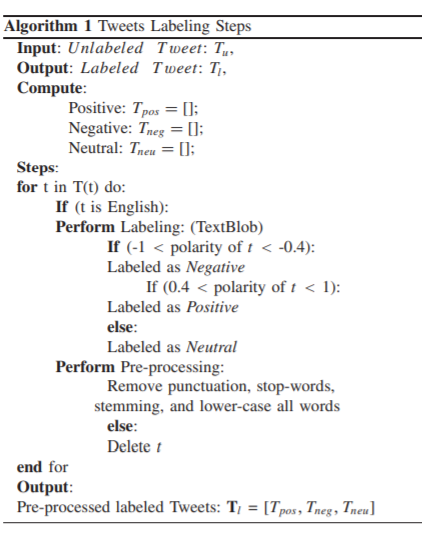

In [26]:
def ratio(x):
  if x>0.4:
    return 1
  elif x<-0.4:
    return -1
  else:
    return 0;

# Working On the DF using textblob

In [27]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweet Content'].apply(polarity)
df['subjectivity'] = df['Tweet Content'].apply(subjectivity)

In [28]:
df['class'] = df['polarity'].apply(ratio)
df


,Tweet Content,polarity,subjectivity,class
0,Also the entire Swiss Football League is on ho...,-0.050000,0.32500,0
1,World Health Org Official: Trump’s press confe...,0.114286,0.35119,0
2,"I mean, Liberals are cheer-leading this #Coron...",-0.076250,0.61375,0
3,"Under repeated questioning, Pompeo refuses to ...",0.000000,0.00000,0
4,#coronavirus comments now from @larry_kudlow h...,0.000000,0.00000,0
...,...,...,...,...
60155,El #coronavirus entérico felino es un virus in...,0.000000,0.00000,0
60156,"RT @timhquotes: It's my party, you're invited!...",0.000000,0.00000,0
60157,"It's my party, you're invited!\n\nPS, this is ...",0.000000,0.00000,0
60158,Amy’s a survivor! #bariclab #pnnl #movingon #c...,0.000000,0.00000,0


In [29]:
df['class'].unique()

array([ 0,  1, -1])

In [30]:
# number of tweets in each section
df['class'].value_counts()

 0    57212
 1     2134
-1      814
Name: class, dtype: int64

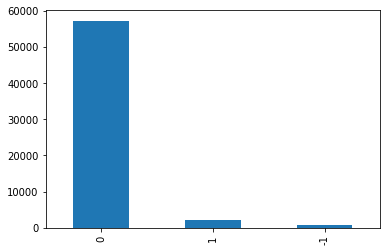

In [31]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()

# Working on DF1

In [32]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df1['polarity'] = df1['Tweet Content'].apply(polarity)
df1['subjectivity'] = df1['Tweet Content'].apply(subjectivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [33]:
# applying textblob
df1['class'] = df1['polarity'].apply(ratio)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet Content,polarity,subjectivity,class
0,Also the entire Swiss Football League is on ho...,-0.050000,0.325000,0
1,World Health Org Official: Trump’s press confe...,0.114286,0.351190,0
2,"I mean, Liberals are cheer-leading this #Coron...",-0.076250,0.613750,0
3,"Under repeated questioning, Pompeo refuses to ...",0.000000,0.000000,0
4,#coronavirus comments now from @larry_kudlow h...,0.000000,0.000000,0
...,...,...,...,...
19995,RT @Arslan_Crickter: She is a volunteer lady d...,0.000000,0.500000,0
19996,RT @BraveTheWorld: India just announced that t...,0.037500,0.575000,0
19997,RT @TuurDemeester: #coronavirus: New HK study ...,-0.050284,0.413636,0
19998,RT @PDChina: 20 patients were discharged from ...,0.000000,0.000000,0


In [34]:
df1['class'].value_counts()

 0    18650
 1     1019
-1      331
Name: class, dtype: int64

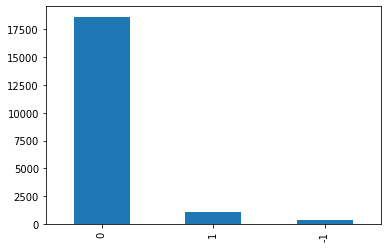

In [35]:
df1['class'].value_counts().plot(kind = 'bar')
plt.show()

# Working on the DF2

In [36]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df2['polarity'] = df2['Tweet Content'].apply(polarity)
df2['subjectivity'] = df2['Tweet Content'].apply(subjectivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
df2['class'] = df2['polarity'].apply(ratio)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Tweet Content,polarity,subjectivity,class
20000,RT @PressSec: President @realDonaldTrump is ta...,0.016667,0.144444,0
20001,"Tedros Adhanom, Director General de la OMS: ""D...",0.050000,0.500000,0
20002,RT @La_manina__: Salvini dice che la Lega da g...,-0.156250,0.375000,0
20003,"RT @AlanAdameMX: ✈️ Tiene razón @m_ebrard, los...",0.000000,0.000000,0
20004,RT @TombStoneWyatt: This is in the infected di...,0.000000,0.000000,0
...,...,...,...,...
39995,RT @WalhallaMann: Estados Unidos prohibió el i...,0.000000,0.000000,0
39996,@theJagmeetSingh How #China treats the livesto...,0.025196,0.606750,0
39997,#ÚltimaHora \nPrimer caso de #coronavirus de W...,0.000000,0.000000,0
39998,RT @pietroraffa: Salgo su un treno per Pesaro....,0.000000,0.000000,0


In [38]:
df2['class'].value_counts()

 0    19219
 1      528
-1      253
Name: class, dtype: int64

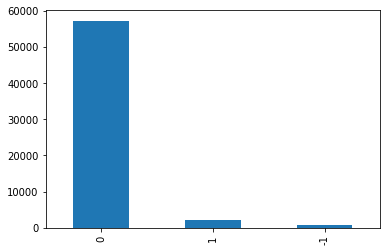

In [39]:
df['class'].value_counts().plot(kind = 'bar')
plt.show()


# working on DF3

In [40]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df3['polarity'] = df3['Tweet Content'].apply(polarity)
df3['subjectivity'] = df3['Tweet Content'].apply(subjectivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:
df3['class'] = df3['polarity'].apply(ratio)
df3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Tweet Content,polarity,subjectivity,class
40000,RT @MinSaludGuate: #MSPAS #MinSaludGt #NotiSal...,0.0,0.0,0
40001,RT @sanidadgob: El Centro Nacional de Microbio...,0.0,0.0,0
40002,RT @pietroraffa: Salgo su un treno per Pesaro....,0.0,0.0,0
40003,RT @PedroMCasals: Emergencia internacional por...,0.0,0.0,0
40004,RT @sanidadgob: El Centro Nacional de Microbio...,0.0,0.0,0
...,...,...,...,...
60155,El #coronavirus entérico felino es un virus in...,0.0,0.0,0
60156,"RT @timhquotes: It's my party, you're invited!...",0.0,0.0,0
60157,"It's my party, you're invited!\n\nPS, this is ...",0.0,0.0,0
60158,Amy’s a survivor! #bariclab #pnnl #movingon #c...,0.0,0.0,0


In [42]:

df3['class'].value_counts()

 0    19343
 1      587
-1      230
Name: class, dtype: int64

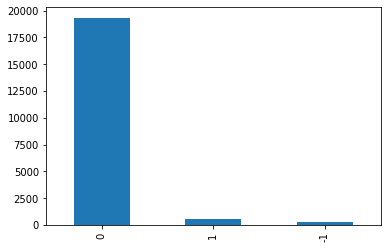

In [43]:
df3['class'].value_counts().plot(kind = 'bar')
plt.show()


# Tweet Processing

1. Removing @users

In [44]:
import re

In [45]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [46]:
df['Processed_Tweet'] = np.vectorize(remove_pattern)(df['Tweet Content'], '@[\w]*')

In [47]:
df.head()

,Tweet Content,polarity,subjectivity,class,Processed_Tweet
0,Also the entire Swiss Football League is on ho...,-0.050000,0.32500,0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...,0.114286,0.35119,0,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron...",-0.076250,0.61375,0,"I mean, Liberals are cheer-leading this #Coron..."
3,"Under repeated questioning, Pompeo refuses to ...",0.000000,0.00000,0,"Under repeated questioning, Pompeo refuses to ..."
4,#coronavirus comments now from @larry_kudlow h...,0.000000,0.00000,0,#coronavirus comments now from here. https://...


2. Removing the HTTP's and URL's from tweets

In [48]:
df['Processed_Tweet'] = df['Tweet Content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [49]:
df.head(2)

,Tweet Content,polarity,subjectivity,class,Processed_Tweet
0,Also the entire Swiss Football League is on ho...,-0.050000,0.32500,0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...,0.114286,0.35119,0,World Health Org Official: Trump’s press confe...


3. Removing the special characters, numbers

In [50]:
df['Processed_Tweet'] = df['Tweet Content'].str.replace('[^a-zA-Z#]+',' ')

In [51]:
df.head(2)

,Tweet Content,polarity,subjectivity,class,Processed_Tweet
0,Also the entire Swiss Football League is on ho...,-0.050000,0.32500,0,Also the entire Swiss Football League is on ho...
1,World Health Org Official: Trump’s press confe...,0.114286,0.35119,0,World Health Org Official Trump s press confer...


4. Removing the Short words.

In [52]:
df['Processed_Tweet'] = df['Tweet Content'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [53]:
df.head()

,Tweet Content,polarity,subjectivity,class,Processed_Tweet
0,Also the entire Swiss Football League is on ho...,-0.050000,0.32500,0,Also the entire Swiss Football League hold. Po...
1,World Health Org Official: Trump’s press confe...,0.114286,0.35119,0,World Health Org Official: Trump’s press confe...
2,"I mean, Liberals are cheer-leading this #Coron...",-0.076250,0.61375,0,"mean, Liberals are cheer-leading this #Coronav..."
3,"Under repeated questioning, Pompeo refuses to ...",0.000000,0.00000,0,"Under repeated questioning, Pompeo refuses say..."
4,#coronavirus comments now from @larry_kudlow h...,0.000000,0.00000,0,#coronavirus comments now from @larry_kudlow h...


In [54]:
from wordcloud import WordCloud

In [55]:
all_words = ' '.join([text for text in df['Processed_Tweet']])

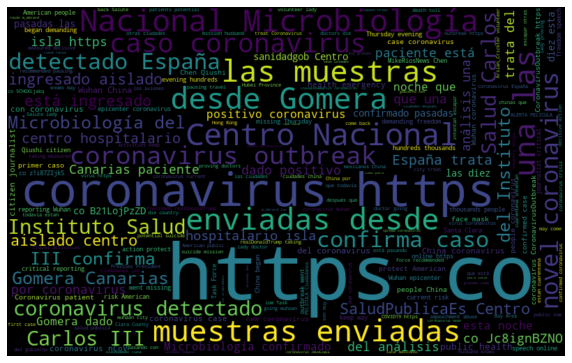

In [56]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

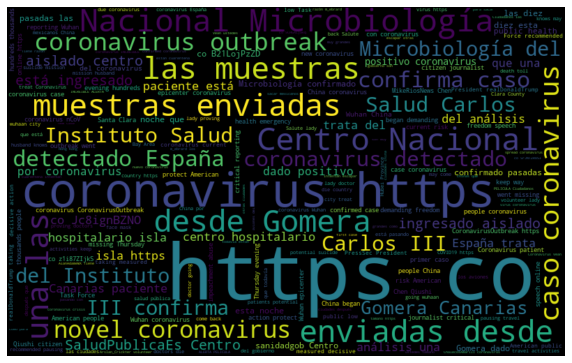

In [57]:
normal_words = ' '.join([text for text in df['Processed_Tweet'][df['class'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [58]:
# understanding the hashtags
hashtags = [] 
def hashtag_extract(x):
    #hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [59]:
HT_Positive = hashtag_extract(df['Processed_Tweet'][df['class']==1])

In [60]:
HT_Negetive = hashtag_extract(df['Processed_Tweet'][df['class']==-1])

In [61]:
HT_Neutral = hashtag_extract(df['Processed_Tweet'][df['class']==0])

In [69]:
Tweet_Word = []

In [70]:
Tweet_Word = sum(HT_Positive,[])

In [71]:
Tweet_Word = sum(HT_Negetive,[])

In [72]:
Tweet_Word = sum(HT_Neutral,[])

In [75]:
print(Tweet_Word)

['DailyDose', 'Delhi', 'Coronavirus', 'coronavirus', 'COVID2019', 'coronavirus', 'islandlife', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirus', 'covid19', 'CoronaVirus', 'Coronavirus', 'coronavirus', 'Bernie', 'coronavirus', 'CoronaVirus', 'AfricasGlobalBank', 'CoronavirusInNigeria', 'UBACares', 'COVID19Nigeria', 'coronavirus', 'COVID19', 'TuneIn', 'coronavirus', 'coronavirus', 'coronavirus', 'COVID19', 'coronavirusnigeria', 'Coronavirus', 'Coronavirus', 'TellThePeopleTheTruth', 'Coronavirus', 'covid19', 'coronavirus', 'coronavirus', 'coronavirus', 'COVID19', 'Coronavirus', 'CoronaVirusUpdates', 'CoronavirusInNigeria', 'COVID19', 'travel', 'cruiselines', 'TuneIn', 'Iran', 'Ahvaz', 'CoronavirusOutbreak', 'Coronavirus', 'COVD19', 'Coronavirus', 'GlobalTranslations', 'coronavirus', 'supertuesday', 'BernieSanders', 'bloomberg', 'dogfight', 'BQMarketNow', 'coronavirus', 'coronavirus', 'publichealth', 'CoronaVirus', 'COVID19', 'Coronavirus', 'coronavirusnigeria', 'CoronaVirusUpdates',

In [73]:
import seaborn as sns 
import nltk

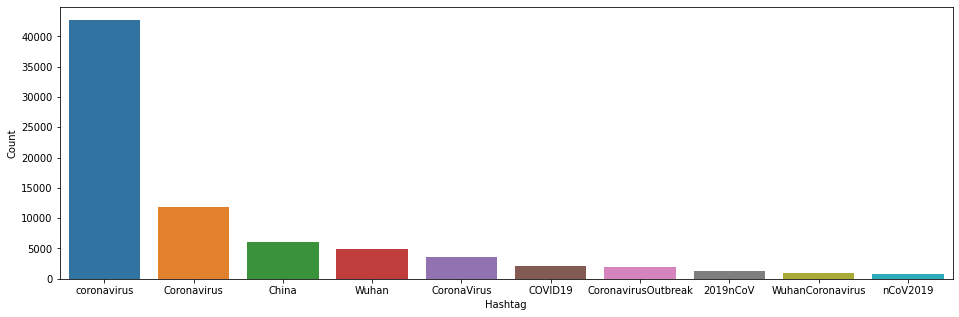

In [76]:
a = nltk.FreqDist(Tweet_Word)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.show()

In [78]:
new_df = df[['Processed_Tweet','class']]

In [79]:
new_df

,Processed_Tweet,class
0,Also the entire Swiss Football League hold. Po...,0
1,World Health Org Official: Trump’s press confe...,0
2,"mean, Liberals are cheer-leading this #Coronav...",0
3,"Under repeated questioning, Pompeo refuses say...",0
4,#coronavirus comments now from @larry_kudlow h...,0
...,...,...
60155,#coronavirus entérico felino virus intestinal ...,0
60156,"@timhquotes: It's party, you're invited! PS, t...",0
60157,"It's party, you're invited! PS, this life phil...",0
60158,Amy’s survivor! #bariclab #pnnl #movingon #cor...,0


In [85]:
new_df.rename(columns={'class':'sentiment'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
new_df.rename(columns={'Processed_Tweet':'Tweet'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
new_df.head()

,Tweet,sentiment
0,Also the entire Swiss Football League hold. Po...,0
1,World Health Org Official: Trump’s press confe...,0
2,"mean, Liberals are cheer-leading this #Coronav...",0
3,"Under repeated questioning, Pompeo refuses say...",0
4,#coronavirus comments now from @larry_kudlow h...,0


In [92]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df['sentiment'].values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (48128, 2)
valid shape :  (12032, 2)


In [93]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

In [96]:
X_train = vectorizer.fit_transform(train.Tweet.values)
X_valid = vectorizer.transform(valid.Tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (48128, 78112)
X_train.shape :  (12032, 78112)
y_train.shape :  (48128,)
y_valid.shape :  (12032,)


In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [99]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.9539145611702128
Validation accuracy Score :  0.9621010638297872
              precision    recall  f1-score   support

          -1       0.40      0.53      0.45       123
           0       0.99      0.97      0.98     11585
           1       0.53      0.69      0.60       324

    accuracy                           0.96     12032
   macro avg       0.64      0.73      0.68     12032
weighted avg       0.97      0.96      0.96     12032



In [100]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9963015292553191
Validation accuracy Score :  0.9808011968085106
              precision    recall  f1-score   support

          -1       0.61      0.93      0.74       106
           0       1.00      0.98      0.99     11590
           1       0.70      0.90      0.79       336

    accuracy                           0.98     12032
   macro avg       0.77      0.94      0.84     12032
weighted avg       0.98      0.98      0.98     12032



In [101]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.9963015292553191
Validation accuracy Score :  0.9808011968085106
              precision    recall  f1-score   support

          -1       0.61      0.93      0.74       106
           0       1.00      0.98      0.99     11590
           1       0.70      0.90      0.79       336

    accuracy                           0.98     12032
   macro avg       0.77      0.94      0.84     12032
weighted avg       0.98      0.98      0.98     12032



In [102]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.9615608377659575
Validation accuracy Score :  0.960189494680851
              precision    recall  f1-score   support

          -1       0.13      1.00      0.23        21
           0       1.00      0.96      0.98     11911
           1       0.22      0.95      0.36       100

    accuracy                           0.96     12032
   macro avg       0.45      0.97      0.52     12032
weighted avg       0.99      0.96      0.97     12032



In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9984624335106383
Validation accuracy Score :  0.9813829787234043
              precision    recall  f1-score   support

          -1       0.58      0.94      0.71       100
           0       1.00      0.98      0.99     11597
           1       0.72      0.91      0.80       335

    accuracy                           0.98     12032
   macro avg       0.76      0.95      0.84     12032
weighted avg       0.99      0.98      0.98     12032



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
